In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = pd.read_csv("../localdata/Clean_Quasar_Data.csv")

X = data[['PSFFLUX_0_LUMINOSITY', 'PSFFLUX_1_LUMINOSITY', 'PSFFLUX_2_LUMINOSITY', 'PSFFLUX_3_LUMINOSITY', 'PSFFLUX_4_LUMINOSITY',
          'FUV_LUMINOSITY', 'NUV_LUMINOSITY', 'YFLUX_LUMINOSITY', 'JFLUX_LUMINOSITY', 'HFLUX_LUMINOSITY', 'KFLUX_LUMINOSITY',
          'W1_FLUX_LUMINOSITY', 'W2_FLUX_LUMINOSITY', 'FIRST_FLUX_LUMINOSITY', 'XMM_SOFT_FLUX_LUMINOSITY', 'XMM_HARD_FLUX_LUMINOSITY',
          'GAIA_G_FLUX_SNR_LUMINOSITY', 'GAIA_BP_FLUX_SNR_LUMINOSITY', 'GAIA_RP_FLUX_SNR_LUMINOSITY']]
y = data['BAL_PROB']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=365)

# KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# SMOTE for handling imbalanced dataset
smote = SMOTE(random_state=365)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

rf_model = RandomForestClassifier(n_estimators=100, random_state=365, class_weight='balanced')
rf_model.fit(X_train_res, y_train_res)

y_pred = rf_model.predict(X_test)

# Accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Confusion Matrix
test_conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{test_conf_matrix}')

# Classification Report
test_class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{test_class_report}')

# Feature Importances
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
print("Feature Importances:\n", importance_df)


Test Accuracy: 0.8738
Confusion Matrix:
[[56493  6214]
 [ 2283  2315]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93     62707
         1.0       0.27      0.50      0.35      4598

    accuracy                           0.87     67305
   macro avg       0.62      0.70      0.64     67305
weighted avg       0.91      0.87      0.89     67305

Feature Importances:
                         Feature  Importance
12           W2_FLUX_LUMINOSITY    0.143731
11           W1_FLUX_LUMINOSITY    0.099326
0          PSFFLUX_0_LUMINOSITY    0.085670
1          PSFFLUX_1_LUMINOSITY    0.064875
4          PSFFLUX_4_LUMINOSITY    0.064531
3          PSFFLUX_3_LUMINOSITY    0.061026
17  GAIA_BP_FLUX_SNR_LUMINOSITY    0.060243
2          PSFFLUX_2_LUMINOSITY    0.057460
6                NUV_LUMINOSITY    0.056771
16   GAIA_G_FLUX_SNR_LUMINOSITY    0.052255
18  GAIA_RP_FLUX_SNR_LUMINOSITY    0.045767
5                FUV_LUMINOSI

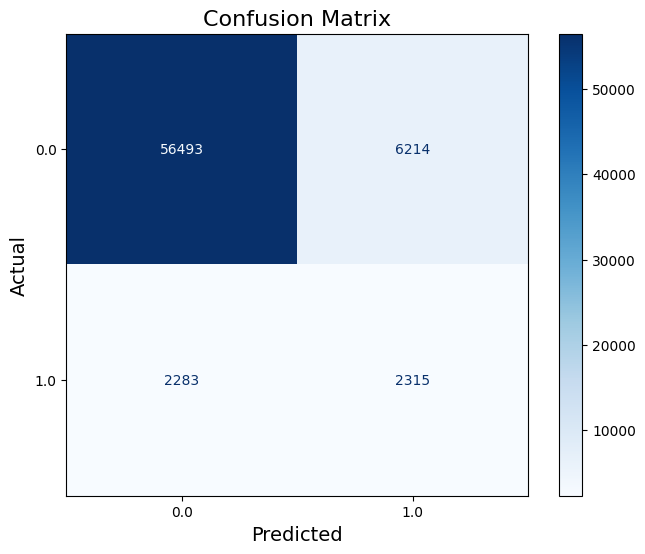

<ipython-input-8-aa0793044789>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  seaborn.barplot(


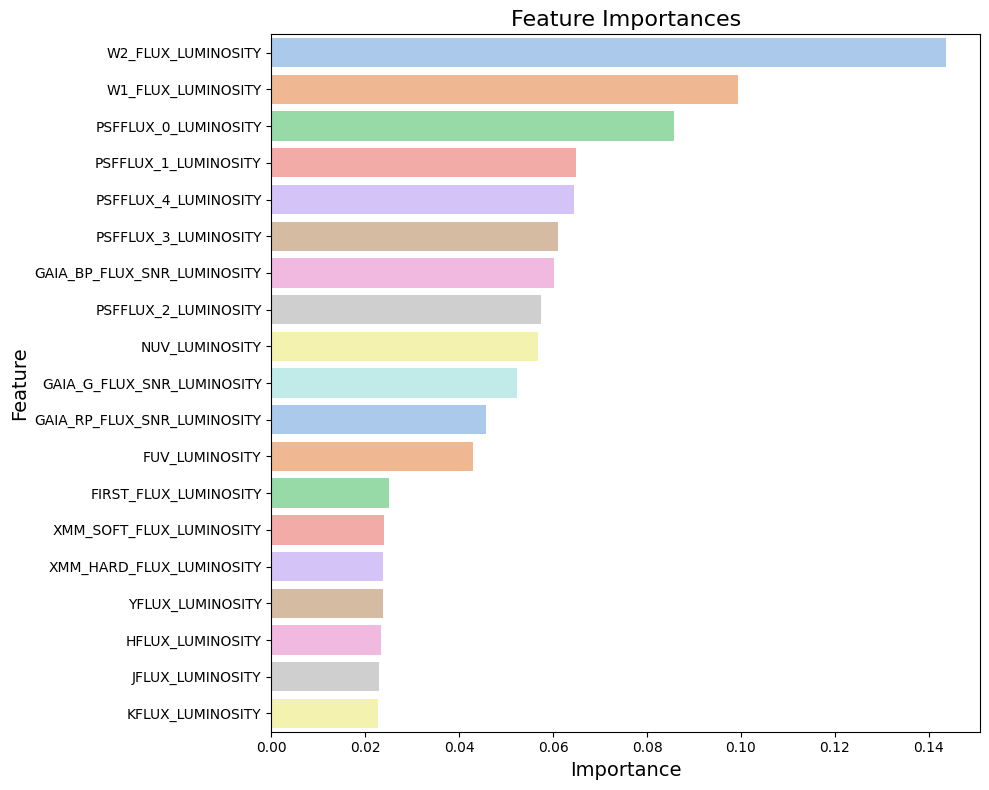

In [8]:
import matplotlib.pyplot as plt
import seaborn
from sklearn.metrics import ConfusionMatrixDisplay

# CONFUSION MATRIX VISUALIZATION
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    cmap="Blues",
    ax=ax,
    colorbar=True
)
ax.set_title("Confusion Matrix", fontsize=16)
ax.set_xlabel("Predicted", fontsize=14)
ax.set_ylabel("Actual", fontsize=14)
plt.show()

# FEATURE IMPORTANCES VISUALIZATION
plt.figure(figsize=(10, 8))
sorted_importance_df = importance_df.head(19)
seaborn.barplot(
    x="Importance",
    y="Feature",
    data=sorted_importance_df,
    palette="pastel"
)
plt.title("Feature Importances", fontsize=16)
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.tight_layout()
plt.show()

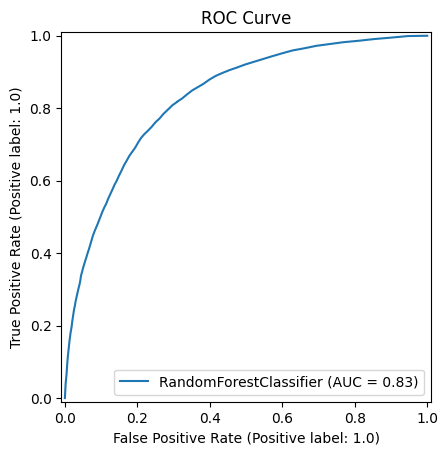

In [10]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("ROC Curve")
plt.show()